## **Developer Account Application**

Twitter data collection requires registering a developer account and applying for API keys.

https://developer.twitter.com/en/apply-for-access

In the developer portal apply for a standard student account.


![picture1](https://drive.google.com/uc?export=view&id=1sHg0J_UVyjL5Kzy0pPEGRoinjs56YK96)

The application asks for the following information:
- E-mail Verification 
- Answering some questions how to use twitter API (200 characters)
- Time to approval can take a day or two.

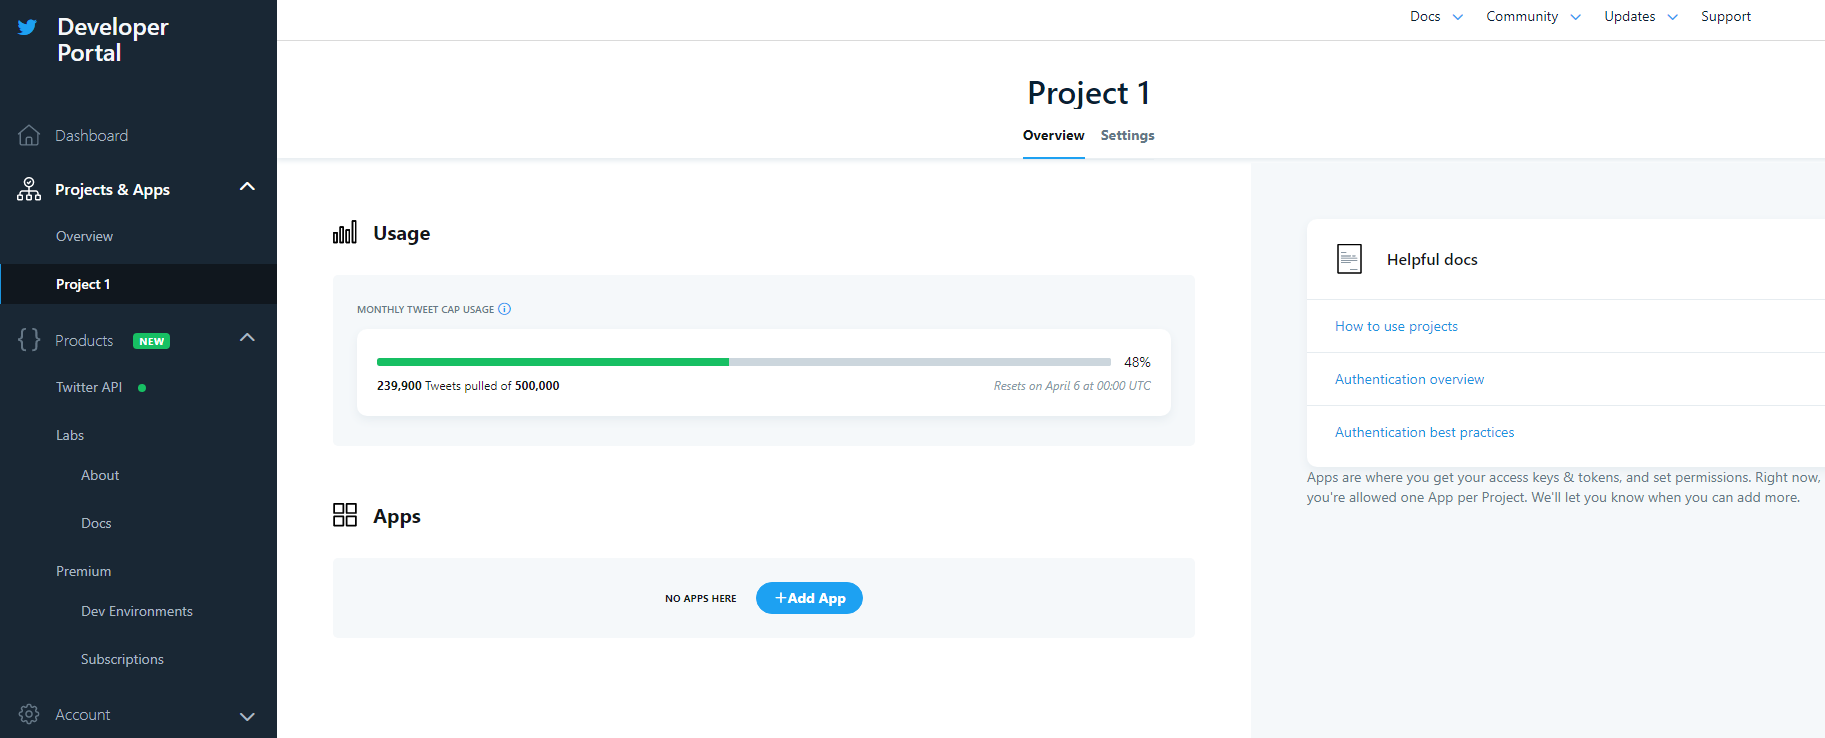

* Add Apps 를 해서 신규 app 을 생성하면 API 키 등이 배정됨
* 검색가능기간은 최대 일주일(검색 시작 기준), 매달 50만개의 트윗 수집가능

## **API Key Generation**
Upon approval, you receive the API credentials consisting of the following:
- API Key: XXXXX
- API Secret Key: YYYYY
- Bearer Token: ZZZZZ
- Store these keys in a secure file




In [2]:
pip3 install searchtweets-v2
pip install pyyaml &> /dev/null

SyntaxError: invalid syntax (<ipython-input-2-48e9dafe8f0a>, line 1)

In [ ]:
from searchtweets import load_credentials, collect_results, gen_request_parameters
import yaml
import pandas as pd
import pickle
import os
import sys

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
API_KEY = '본인 것'
API_SECRET_KEY = '본인 것'
BEARER_TOKEN = '본인 것'

RESULTS_PER_CALL = 100 #1번에 10000개의 트윗

# **Example**

P.S: 왜 YAML 포맷을 사용하는가에 대해서는 아래 링크 참조
*   https://www.inflearn.com/questions/16184

In [ ]:
config = dict(
    search_tweets_v2=dict(
        endpoint="https://api.twitter.com/2/tweets/search/recent", 
        consumer_key=API_KEY,
        consumer_secret=API_SECRET_KEY,
        bearer_token=BEARER_TOKEN
    )
)

with open('twitter_keys.yaml', 'w') as config_file: # Save twitter API code into local computer as yaml format
    yaml.dump(config, config_file, default_flow_style=False) # yaml 형태로 저장할 때 yaml 자체의 자료저장 형태가 아닌 config에서 지정한 dictionary 형태로 저장하도록 default_flow_style=False 로 해줌

In [ ]:
## Load twitter API code from previous setting

search_args = load_credentials("twitter_keys.yaml", # load_credentials: yaml 파일에서 config에서 search_tweets_v2 로 지정해놓은 변수를 찾으려고 시도
                               yaml_key="search_tweets_v2"
                               )

In [ ]:
## Set parameters (https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet 참고)
# tweet_fields에서 가져오고 싶은 메타데이터를 획득가능, 단 tweet_fields="" 에 들어가는 항목들은 반드시 띄어쓰기 없이 comma 단위로 나열할 것

rule = gen_request_parameters(query=SEARCH_QUERY,
                              results_per_call=RESULTS_PER_CALL,
                              tweet_fields="public_metrics,created_at,entities" # public_metrics: retweet+quote+favorite number / created_at: time tweet created / entities: url etc.
                              )

In [ ]:
## Collect data
# request time limit 를 넘어버릴 경우 HTTP Error code: 429: Rate limit exceeded 가 뜰 수 있음 450 request/15 min (실제 자료 수집엔 영향 없음)

TWEETS = collect_results(rule,
                         max_tweets=MAX_TWEETS,
                         result_stream_args=search_args)

len(TWEETS) # 위에선 MAX_TWEETS = 1000 으로 했는데 왜 1010개가 수집되었는지 아래에서 설명

1010

In [ ]:
TWEETS[0]

{'created_at': '2021-03-28T15:05:13.000Z',
 'entities': {'annotations': [{'end': 101,
    'normalized_text': 'HIV',
    'probability': 0.494,
    'start': 99,
    'type': 'Other'}],
  'hashtags': [{'end': 187, 'start': 175, 'tag': 'NZGovActNow'}],
  'mentions': [{'end': 191, 'start': 188, 'username': 'UN'},
   {'end': 201, 'start': 192, 'username': 'Refugees'},
   {'end': 216, 'start': 202, 'username': 'UNHumanRights'},
   {'end': 230, 'start': 217, 'username': 'NanaiaMahuta'},
   {'end': 243, 'start': 231, 'username': 'JennySalesa'}],
  'urls': [{'display_url': 'bit.ly/3m04PZC',
    'end': 267,
    'expanded_url': 'https://bit.ly/3m04PZC',
    'start': 244,
    'status': 404,
    'unwound_url': 'https://www.channel4.com/news/the-horrors-of-the-hidden-war-inside-the-tigray-conflict-in%20-ethiopia',
    'url': 'https://t.co/I169EUXVzA'}]},
 'id': '1376188634295046152',
 'public_metrics': {'like_count': 0,
  'quote_count': 0,
  'reply_count': 0,
  'retweet_count': 0},
 'text': 'Nurse Mul

In [ ]:
## Check data through 1st Tweet
# API를 통해 트위터 서버에서 자료를 가져옴에도 불구하고 텍스트, url 등이 항상 수집되지는 않는 경우가 발생 / 가령 (리)트윗 전체 내용이 텍스트 없이 영상으로만 구성된 경우 (이후 자료처리에서 passing 처리)
# https://twitterdev.github.io/tweet_parser/tweet_parser.getter_methods.html#module-tweet_parser.getter_methods.tweet_links

print(TWEETS[10]['public_metrics']['retweet_count']) # the number of retweets recieved
print(TWEETS[0]['public_metrics']['quote_count']) # the number of quotes recieved
print(TWEETS[0]['public_metrics']['like_count']) # the number of favorites recieved

# 트윗 api에서 링크가 제시된 다른 주소로 redirect하는 경우가 있어 원래 트윗 주소를 확인하기 위한 방법
# https://blog.twitter.com/developer/en_us/topics/tips/2020/getting-to-the-canonical-url-for-a-tweet.html 참고
num = TWEETS[0]['id']
print(f'https://twitter.com/twitter/status/{num}') # tweet url

print(TWEETS[0]['created_at'][0:10]) # the date tweet written
print(TWEETS[0]['text'].replace('\n', ' ')) # tweet text

0
0
0
https://twitter.com/twitter/status/1376188634295046152
2021-03-28
Nurse Mulu seen 260 rape victims which reported, who now, due to the rape acquire diseases such as HIV, hepatitis and STIs. Human rights Violation should not be taken lightly #NZGovActNow @UN @Refugees @UNHumanRights @NanaiaMahuta @JennySalesa https://t.co/I169EUXVzA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save collected data as pickle format, if you want

with open(f'/content/drive/MyDrive/소셜빅데이터분석_2021/TWEETS_API.pickle', 'wb') as f:
    pickle.dump(TWEETS, f)

In [ ]:
import pprint

pprint.pprint(TWEETS[0])

{'created_at': '2021-03-28T15:05:13.000Z',
 'entities': {'annotations': [{'end': 101,
                               'normalized_text': 'HIV',
                               'probability': 0.494,
                               'start': 99,
                               'type': 'Other'}],
              'hashtags': [{'end': 187, 'start': 175, 'tag': 'NZGovActNow'}],
              'mentions': [{'end': 191, 'start': 188, 'username': 'UN'},
                           {'end': 201, 'start': 192, 'username': 'Refugees'},
                           {'end': 216,
                            'start': 202,
                            'username': 'UNHumanRights'},
                           {'end': 230,
                            'start': 217,
                            'username': 'NanaiaMahuta'},
                           {'end': 243,
                            'start': 231,
                            'username': 'JennySalesa'}],
              'urls': [{'display_url': 'bit.ly/3m04PZC',
     

In [ ]:
DATE = []
RETWEET = []
QUOTE = []
LIKE = []
URL = []
TEXT = []

## Text with metadata from pre-collected tweets

for tweet in TWEETS:

    try:
        DATE.append(tweet['created_at'][0:10])
        
        RETWEET.append(tweet['public_metrics']['retweet_count'])
        
        QUOTE.append(tweet['public_metrics']['quote_count'])
                
        LIKE.append(tweet['public_metrics']['like_count'])
        
        num = tweet['id']
        URL.append(f'https://twitter.com/twitter/status/{num}')
        
        TEXT.append(tweet['text'].replace('\n', ' '))
        
    except KeyError: # 트위터 본문이 없거나 api를 통해서 수집되지 않는 메타데이터가 발생했을 경우 'None' 텍스트를 대신 넣고 passing
        DATE.append('NONE')
        RETWEET.append('NONE')
        QUOTE.append('NONE')
        LIKE.append('NONE')
        URL.append('NONE')
        TEXT.append('NONE')

RT = RETWEET + QUOTE

## Save as dataframe format
DF = pd.DataFrame(list(zip(DATE, LIKE, RT, URL, TEXT)), columns =['Date', 'Likes', 'Retweet', 'Url', 'Text'])
DF.head()

,Date,Likes,Retweet,Url,Text
0,2021-03-28,0,0,https://twitter.com/twitter/status/1376188634295046152,"Nurse Mulu seen 260 rape victims which reported, who now, due to the rape acquire diseases such as HIV, hepatitis and STIs. Human rights Violation should not be taken lightly #NZGovActNow @UN @Refugees @UNHumanRights @NanaiaMahuta @JennySalesa https://t.co/I169EUXVzA"
1,2021-03-28,0,0,https://twitter.com/twitter/status/1376188614506336256,How families in Myanmar have to stay in their own house. We live in fear day and night. We are not safe even in our own houses. Where is human rights? Where is safety? JUNTA MASSACRE #Mar28Coup #WhatsHappeningInMyanmar https://t.co/lxx180FvPL
2,2021-03-28,0,0,https://twitter.com/twitter/status/1376188603555065856,'Human Rights' in the US.😆😆😂 https://t.co/t5Q9xgGGTz
3,2021-03-28,0,0,https://twitter.com/twitter/status/1376188589088911360,"#Venezuela El director para las Américas de Human Rights Watch, José Miguel Vivanco, aseguró que ha “recibido denuncias creíbles de abusos por parte de las fuerzas de seguridad @venezolana en contra de la población de #Apure que huyó hacia Arauca” https://t.co/SEKWHRj8za"
4,2021-03-28,0,0,https://twitter.com/twitter/status/1376188582096896003,How families in Myanmar have to stay in their own house. We live in fear day and night. We are not safe even in our own houses. Where is human rights? Where is safety? JUNTA MASSACRE #Mar28Coup #WhatsHappeningInMyanmar https://t.co/GWjbwycSiq


In [ ]:
# API에서 매 100번째마다 지금까지 수집한 트윗을 인덱싱하는 것이 들어가 이를 제거(위 처리에서 해당사항이 없기 때문에 모든 열에 NONE 이 들어가기 때문에 이를 인덱싱해서 제거함

"""
가령 print(100) 의 결과
{'newest_id': '1375738164397154306',
 'next_token': 'b26v89c19zqg8o3fosqt4gg86im0lqrg6t11oc98qscjh',
 'oldest_id': '1375735760352124928',
 'result_count': 100}
"""

idx = DF[(DF['Date'] == 'NONE') & (DF['Url'] == 'NONE') & (DF['Text'] == 'NONE')].index
DF1 = DF.drop(idx)
print(DF1.shape[0])

1000


In [ ]:
## Save as dataframe format
DF1.to_csv(f'/content/drive/MyDrive/소셜빅데이터분석_2021/TWEETS.csv', encoding = 'utf-8-sig', index_label = False, index = False)